In [56]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

FONT_SIZE = 14

params = {
    "lines.markersize":15,
    "lines.linewidth":3,
    "text.usetex":True,
    "font.family":"serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE,
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    "legend.fontsize": FONT_SIZE,
    'text.latex.unicode': True,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",  # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",  # plots will be generated using this preamble
    ]
}
plt.rcParams.update(params)
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/phd-thesis-plots/ml-workload-optimization/experiment_results/remote'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]
OTHER_COLOR = sns.color_palette()[2]

WORKLOADS = {'start_here_a_gentle_introduction':'(a) Workload 1',
            'introduction_to_manual_feature_engineering':'(b) Workload 2',
            'introduction_to_manual_feature_engineering_p2': '(c) Workload 3'}

output_directory = '/Users/bede01/Documents/work/phd-papers/phd-thesis-plots/ml-workload-optimization/figures'

def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
def savefig(filename):
#     plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')

In [57]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/different_workloads/kaggle_home_credit/cloud-41'
IN_PAPER_RESULT_FILE = result_folder + '/2019-10-18/00-22.csv'
RESULT_FILE = result_folder + '/2020-02-04/13-00.csv'
#RESULT_FILE=IN_PAPER_RESULT_FILE

In [58]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload', 'type', 'mat_rate', 'run_time'
]
execution_order = {
    'start_here_a_gentle_introduction': 1,
    'introduction_to_manual_feature_engineering': 2,
    'introduction_to_manual_feature_engineering_p2': 3,
    'fork_cridata_start_here_a_gentle_introduction': 4,
    'fork_taozhongxiao_start_here_a_gentle_introduction': 5,
    'fork_introduction_to_manual_feature_engineering': 6,
    'fork_introduction_to_manual_feature_engineering_p2': 7,
    'fork_join_start_here_intro': 8
}
method_map = {'optimized': 'CO', 'baseline': 'KG', 'helix':'HL'}

execution_times = pd.read_csv(RESULT_FILE, header=None, names=HEADERS)
execution_times['workload_order'] = execution_times['workload'].replace(
    execution_order)
#execution_times = execution_times[execution_times['workload_order'] > 0]
execution_times['cumulative_run_time'] = execution_times.groupby(
    ['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())
execution_times['type'] = execution_times['type'].replace(method_map)
execution_times['cumulative_run_time'] = execution_times['cumulative_run_time'] / 60
#execution_times['workload_order'] = execution_times['workload'].replace(execution_order)

In [63]:
def plot_executions_times(df, loc=None):
    plot = sns.lineplot(
        data=df,
        x='workload_order',
        y='cumulative_run_time',
        hue='type',
        style='type',
        estimator='mean',
        err_kws={'elinewidth':5},

        markers={
            'CO': "o",
            'KG': "^",
            'HL': "X"
        },
        hue_order=['CO', 'KG', 'HL'],
        dashes={
            'CO': (1, 0),
            'KG': (5, 1),
            'HL': (3, 3)
        },
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        },
        ci='sd',
        err_style='bars',
        legend='brief')
    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO', 'KG','HL']
    del handles[0]
    from matplotlib.lines import Line2D
    handles[0] = Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        dashes=(1, 0),
                        marker="o")
    
    handles[1] = Line2D([0], [1],
                        color=BASELINE_COLOR,
                        dashes=(5, 1),
                        marker="^")
    
    handles[2] = Line2D([0], [1],
                        color=sns.color_palette()[2],
                        dashes=(3, 3),
                        marker="X")
    
    legend = plt.legend(
        handles,
        labels,
        frameon=True,
        loc='upper left',
        handlelength=2.5,
        handletextpad=0.1,
        numpoints=1,
        ncol=3,
        columnspacing=0.5)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)
    
    plot.set_xlabel('Workload')
    plot.set_ylabel('Cumulative Run Time (m)')
    plot.set_xticks(range(1,9))
    plot.set_xticklabels(range(1,9))
    return plot

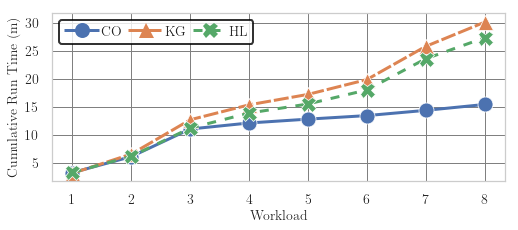

In [64]:
plt.figure(figsize=(7,3))
plot = plot_executions_times(execution_times)
plt.tight_layout(pad=0,h_pad=0,w_pad=0)
savefig(output_directory+'/different_workloads')